## TP 3 - Arbres de décision, SVM

Dans ce TP nous allons explorer deux nouveaux algorithmes supervisés de classification : les arbres de décision et les Support Vector Machines.

Importez les librairies de base dont nous aurons besoin, comme au TP précédent:

In [1]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data


Arbres de Décision
--------

Les arbres de décision appliquent des seuils sur les attributs d'une instance $\mathbf{x_i} \in \mathbb{R}^d$ et ces décisions appliquées en cascade forment un arbre. Exécutez la cellule suivante qui en illustre le principe.

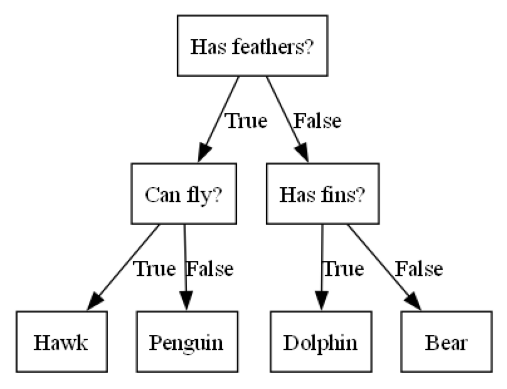

In [2]:
import mglearn
import graphviz
mglearn.plots.plot_animal_tree()

Cet exemple simple montre comment classer une instance dans 4 types d'animaux suivant une réponse binaire à une question. Un exemple plus complexe est montré par la cellule suivante. Interprétez le résultat présenté ainsi que la structure de l'arbre obtenu à chaque étape de l'algorithme.

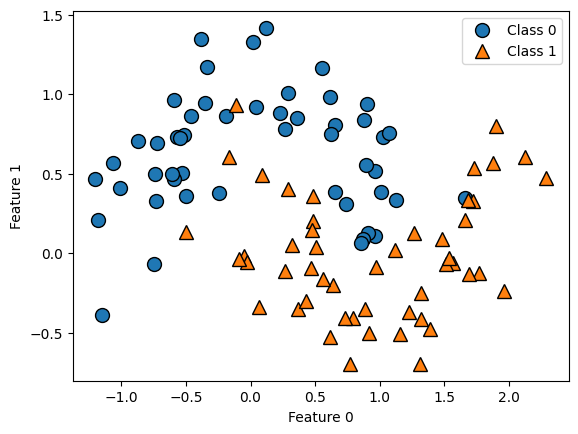

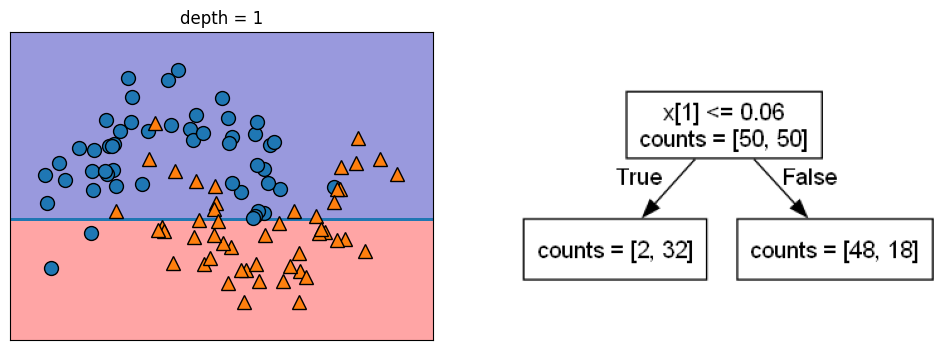

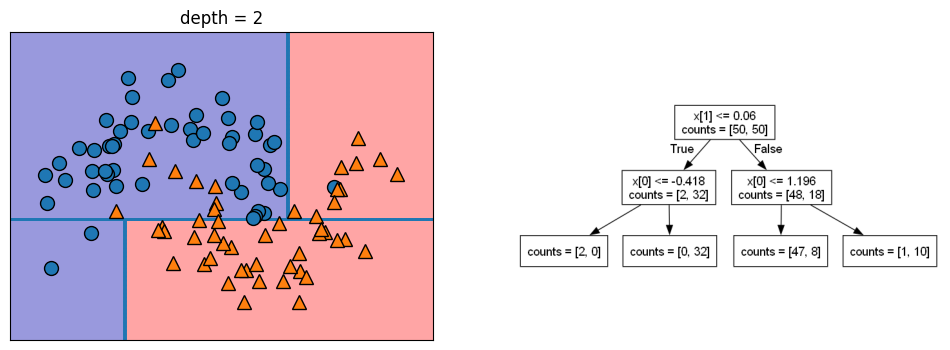

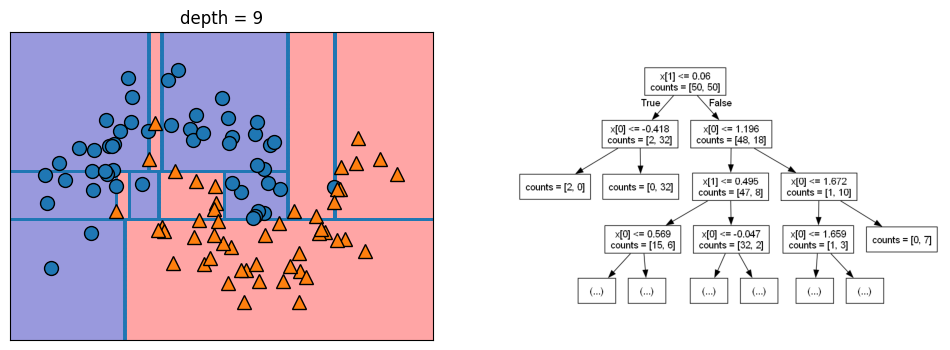

In [3]:
mglearn.plots.plot_tree_progressive()

Pour tester les arbres de décisions, commençons par les explorer pour un dataset synthétique. Nous utiliserons la fonction `make_blobs`
 de `sklearn.datasets`. Importez là (`from sklearn.datasets import make_blobs`) puis générez un dataset de 4 centres avec 300 instances. Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide d'une fonction nommée `plot_data` prenant x et y en paramètres. Mettez une couleur différente par classe.


In [4]:

def plot_data(x, y):
    plt.title('Points du problème de classification')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    res=plt.scatter(x[:,0],x[:,1],marker='o', c=y)
    plt.legend(*res.legend_elements(),loc="upper right", title="Classes")
    


Sur le dataset généré appliquez le classifieur `DecisionTreeClassifier()` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). L'usage est le même que dans le TP précédent avec `fit` pour réaliser l'apprentissage et `predict` pour effectuer une classification. Découpez les données en (x_train, y_train) (75% des données) et de test (x_test, y_test) (25% des données), faites un apprentissage sur les données x_train et affichez les performances sur x_train et x_test, ainsi que la matrice de confusion pour les données de test. Inspirez vous du TP précédent (attention il y a de nombreuses fonctions à importer).

Train accuracy: 1.000
Test  accuracy: 0.987


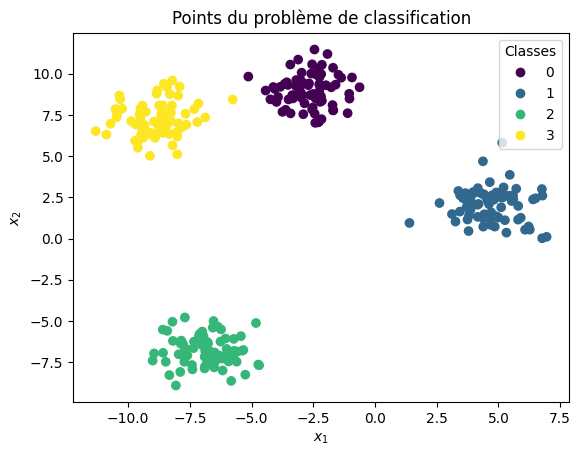

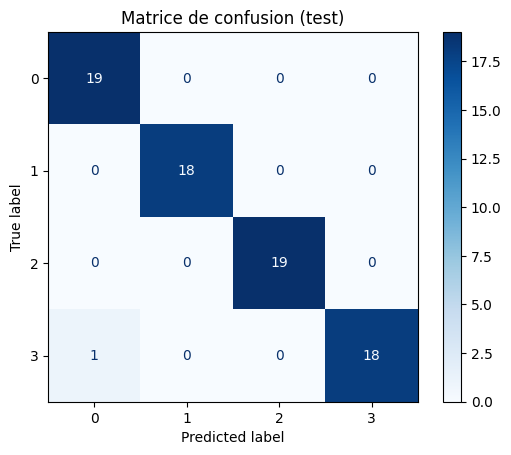

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# générez le dataset (4 centres, 300 instances)
x, y = make_blobs(n_samples=300, centers=4, random_state=42)

# affichage des données
plot_data(x, y)

# découpage train/test (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# apprentissage
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

# performances
train_acc = accuracy_score(y_train, tree.predict(x_train))
test_acc = accuracy_score(y_test, tree.predict(x_test))
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test  accuracy: {test_acc:.3f}")

# matrice de confusion sur le test
cm = confusion_matrix(y_test, tree.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion (test)")
plt.show()

Maintenant que nous avons pu générer un arbre de décision, nous aimerions bien (comme dans la première figure d'illustration): 1) le visualiser, 2) visualiser la frontière de décision entre les classes. La fonction `export_graphviz` de `sklearn.tree` permet de générer une figure de l'arbre (voir documentation à https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html). Il est possible de l'afficher ensuite avec `display(graphviz.Source(figure))`. Générez une figure de l'arbre. Utilisez la fonction fournie `plot_contours` afin d'afficher les données et les frontières de décision.

In [6]:

def plot_contours(x,y,tree):   
    lengths, widths = np.meshgrid(np.linspace(np.min(x[:,0]),np.max(x[:,0]), 100), np.linspace(np.min(x[:,1]),np.max(x[:,1]), 100))
    all = np.c_[lengths.ravel(), widths.ravel()]
    y_pred = tree.predict(all).reshape(lengths.shape)
    plt.contourf(lengths, widths, y_pred,alpha=0.3)
    res=plt.scatter(x[:,0],x[:,1],marker='o', c=y)
    plt.legend(*res.legend_elements(),loc="upper right", title="Classes")
    


Vous allez constater que certaines frontières de décision sont très découpées, ce qui peut être signe d'un sur-apprentissage. Il est possible de contrer cela en utilisant plusieurs arbres de décisions et en faisant la moyenne de leurs prédictions. Un tel classifieur est par exemple le `RandomForestClassifier` (de `sklearn.ensemble`). Faites l'apprentissage avec ce classifieur, affichez ses performances et la frontière de décision.

Random Forest - Train accuracy: 1.000
Random Forest - Test  accuracy: 0.987


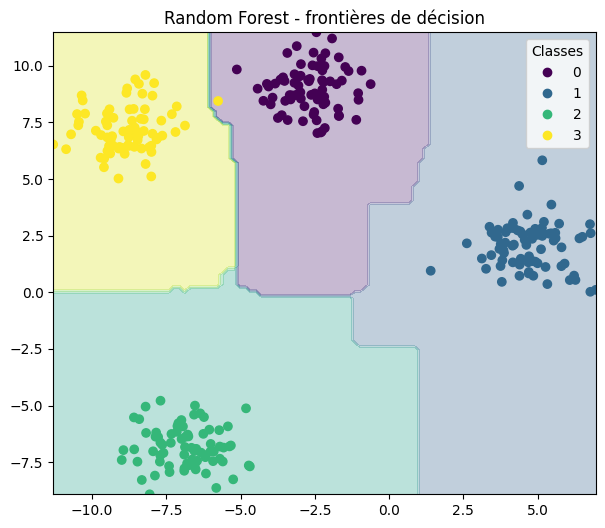

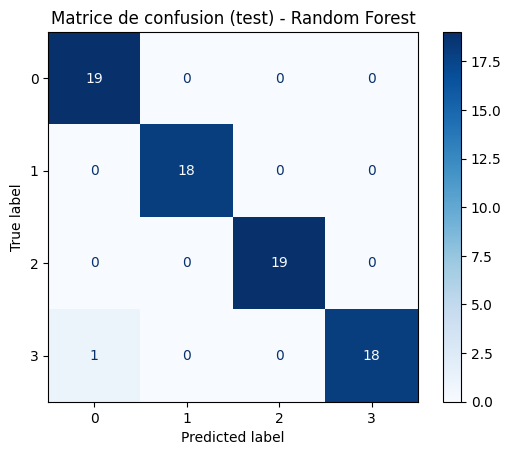

In [7]:
from sklearn.ensemble import RandomForestClassifier

# apprentissage d'un Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# performances
train_acc_rf = accuracy_score(y_train, rf.predict(x_train))
test_acc_rf = accuracy_score(y_test, rf.predict(x_test))
print(f"Random Forest - Train accuracy: {train_acc_rf:.3f}")
print(f"Random Forest - Test  accuracy: {test_acc_rf:.3f}")

# frontière de décision
plt.figure(figsize=(7,6))
plot_contours(x, y, rf)
plt.title("Random Forest - frontières de décision")
plt.show()

# matrice de confusion sur le test
cm_rf = confusion_matrix(y_test, rf.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion (test) - Random Forest")
plt.show()

Maintenant que vous savez utiliser un arbre de décision, appliquez cette technique sur les données iris. Chargez les avec `pandas`comme dans le TP précédent. Retenez uniqument les axes "petal length (cm)", "petal width (cm)" avec `x = iris.data[["petal length (cm)", "petal width (cm)"]].values`, affichez ses performances, l'arbre de décision et les frontières de décision. On peut imposer le nombre minimum d'élements qui sont retenus dans une feuille de l'arbre de décision (avec le paramètre `min_samples_leaf`). Testez son influence.

DecisionTree (default) - Train acc: 0.991, Test acc: 0.921


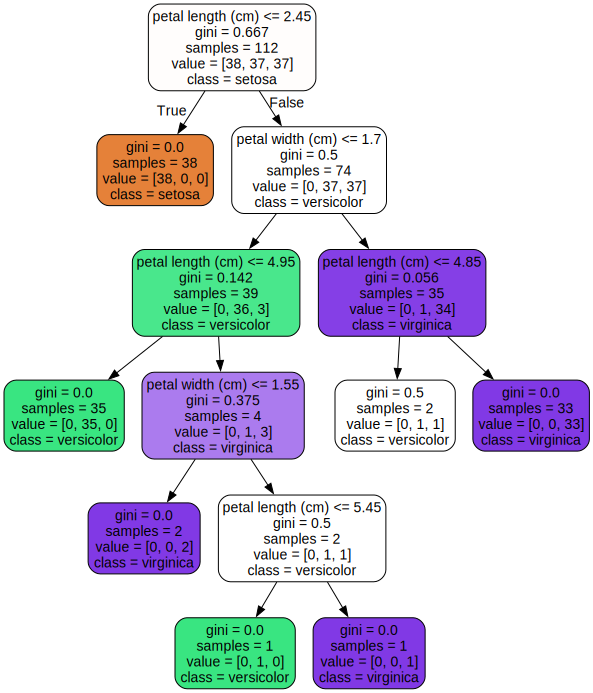

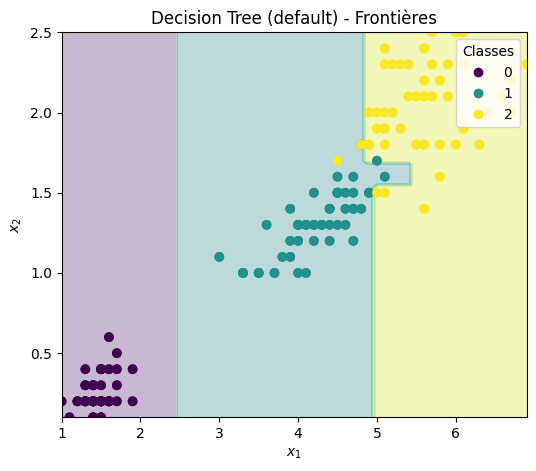


Influence de min_samples_leaf:
 min_samples_leaf= 1 -> Train acc: 0.991, Test acc: 0.921
 min_samples_leaf= 5 -> Train acc: 0.964, Test acc: 0.947
 min_samples_leaf=15 -> Train acc: 0.964, Test acc: 0.947


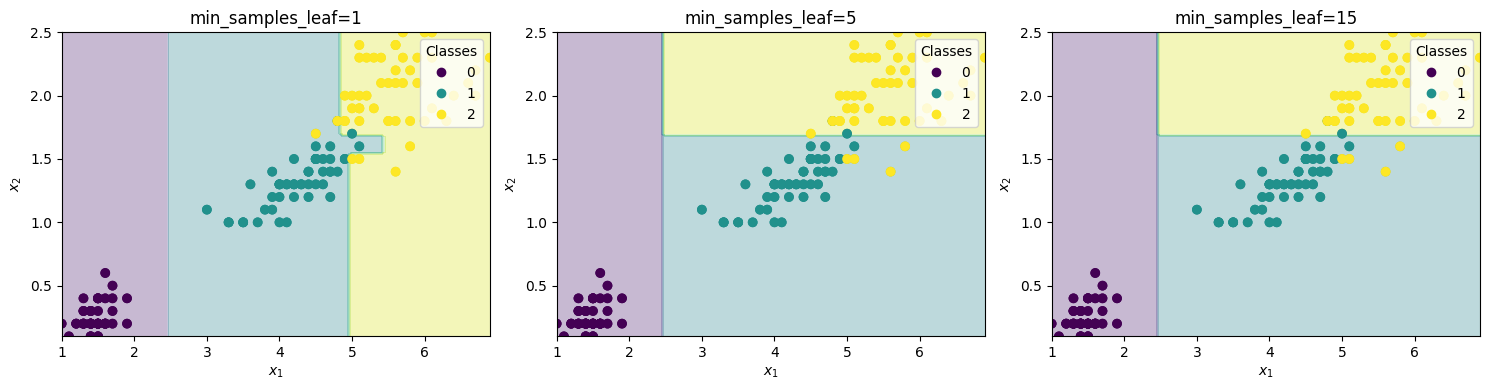

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from IPython.display import display

# charger iris (as_frame=True pour avoir .data en DataFrame)
iris = load_iris(as_frame=True)
x_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

# découpage train/test
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(
    x_iris, y_iris, test_size=0.25, random_state=42, stratify=y_iris
)

# apprentissage : arbre par défaut
tree_iris = DecisionTreeClassifier(random_state=42)
tree_iris.fit(x_train_iris, y_train_iris)

# performances
train_acc_iris = accuracy_score(y_train_iris, tree_iris.predict(x_train_iris))
test_acc_iris = accuracy_score(y_test_iris, tree_iris.predict(x_test_iris))
print(f"DecisionTree (default) - Train acc: {train_acc_iris:.3f}, Test acc: {test_acc_iris:.3f}")

# visualiser l'arbre
dot_data = export_graphviz(
    tree_iris,
    out_file=None,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    filled=True, rounded=True
)
display(graphviz.Source(dot_data))

# frontière de décision (dataset complet)
plt.figure(figsize=(6,5))
plot_data(x_iris, y_iris)
plot_contours(x_iris, y_iris, tree_iris)
plt.title("Decision Tree (default) - Frontières")
plt.show()

# tester l'influence de min_samples_leaf
min_leaf_values = [1, 5, 15]
models = []
print("\nInfluence de min_samples_leaf:")
for m in min_leaf_values:
    clf = DecisionTreeClassifier(min_samples_leaf=m, random_state=42)
    clf.fit(x_train_iris, y_train_iris)
    acc_train = accuracy_score(y_train_iris, clf.predict(x_train_iris))
    acc_test = accuracy_score(y_test_iris, clf.predict(x_test_iris))
    print(f" min_samples_leaf={m:>2} -> Train acc: {acc_train:.3f}, Test acc: {acc_test:.3f}")
    models.append((m, clf))

# afficher frontières pour chaque valeur de min_samples_leaf
plt.figure(figsize=(15,4))
for i, (m, clf) in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    plot_data(x_iris, y_iris)
    plot_contours(x_iris, y_iris, clf)
    plt.title(f"min_samples_leaf={m}")
plt.tight_layout()
plt.show()

Nous allons utiliser à présent un Random Forest pour classer des images de nombres. La cellule suivante permet de charger un tel dataset et d'en afficher une partie.

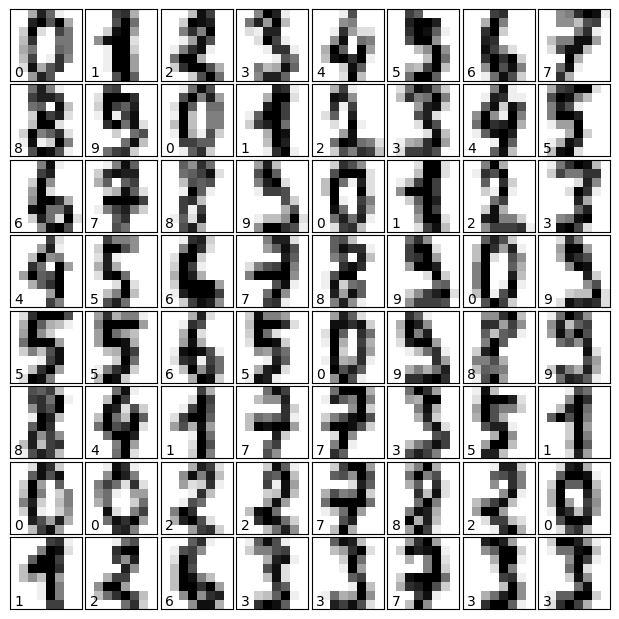

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

Découpez les données en train/tests, Réalisez l'apprentissage d'un Random Forest (avec 1000 arbres), affichez les performances pour l'ensemble de test.

Random Forest (digits) - Test accuracy: 0.971


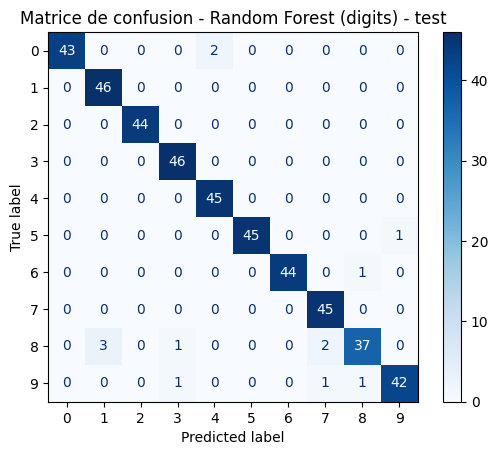

In [10]:
# découpage train/test pour le dataset digits, apprentissage d'un Random Forest à 1000 arbres
X_digits = digits.data
y_digits = digits.target

x_train_digits, x_test_digits, y_train_digits, y_test_digits = train_test_split(
    X_digits, y_digits, test_size=0.25, random_state=42, stratify=y_digits
)

rf_digits = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
rf_digits.fit(x_train_digits, y_train_digits)

test_acc = accuracy_score(y_test_digits, rf_digits.predict(x_test_digits))
print(f"Random Forest (digits) - Test accuracy: {test_acc:.3f}")

cm = confusion_matrix(y_test_digits, rf_digits.predict(x_test_digits))
labels = np.unique(y_digits)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest (digits) - test")
plt.show()

Support Vector Machines
--------

Avec la fonction `make_blobs` générez un dataset synthétique de deux classes avec 50 instances. Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide de la fonction nommée `plot_data`.

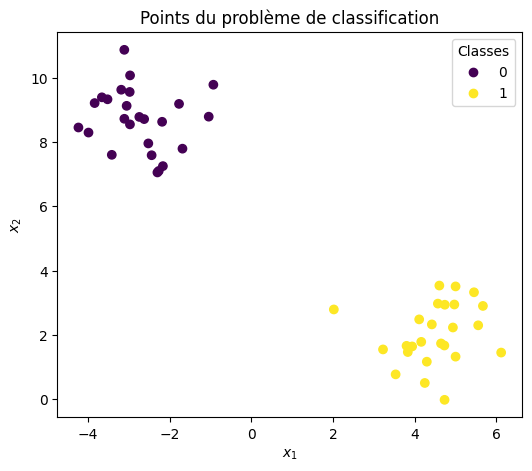

In [11]:
# générer un dataset de 2 classes (50 instances) et l'afficher
x, y = make_blobs(n_samples=50, centers=2, random_state=42)
plt.figure(figsize=(6,5))
plot_data(x, y)
plt.show()

Le classifieur SVM se nomme SVC (Support Vector Classifier) dans scikit-learn (`from sklearn.svm import SVC`). Créez un SVC avec un noyau linéaire et la constante C à `1E10` (voir la documentation à https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Faites l'apprentissage sur les données `(x,y)`, affichez les vecteurs de support.

Nombre de vecteurs de support par classe : [1 1]
Indices des vecteurs de support : [39 24]
Vecteurs de support (coordonnées) :
 [[-2.30033403  7.054616  ]
 [ 2.02013373  2.79507219]]


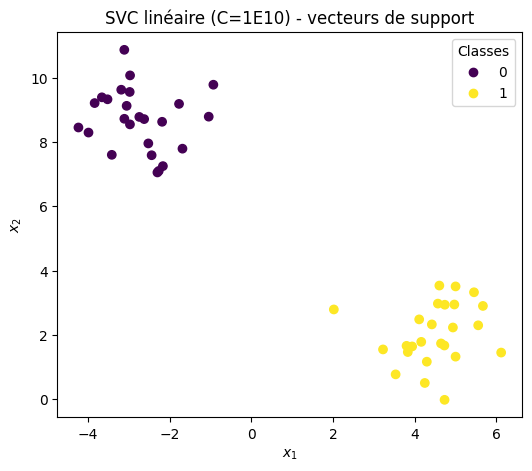

In [12]:
from sklearn.svm import SVC
# créer et entraîner le SVC linéaire avec C très grand
svc = SVC(kernel='linear', C=1E10)
svc.fit(x, y)

# afficher les vecteurs de support
print("Nombre de vecteurs de support par classe :", svc.n_support_)
print("Indices des vecteurs de support :", svc.support_)
print("Vecteurs de support (coordonnées) :\n", svc.support_vectors_)

# afficher les points et la frontière + vecteurs de support
plt.figure(figsize=(6,5))
plot_data(x, y)
plt.title("SVC linéaire (C=1E10) - vecteurs de support")
plt.show()

La fonction suivante permet d'afficher la frontière de séparation pour un svm donné en paramètre, ainsi que les vecteurs de support. À l'aide de cette fonction affichez la frontière de séparation, après avoir affiché les point avec `plot_data`.

In [15]:
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # crée la grille pour évaluer le modèle
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot de la fonction de décision et des marges
    ax.contour(X, Y, P, levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    
    # plot des vecteurs support
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=300, linewidth=1, alpha=0.3, c='#FF0000');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Nous allons à présent générer un dataset qui n'est pas séparable linéairement (c-à-d qu'une droite ne peut pas séparer les deux classes).

In [16]:
x, y = data.make_circles(100, factor=.1, noise=.1)

Un SVM linéaire ne fonctionnera pas sur ce dataset, nous allons donc changer de noyau (kernel) et passer à un noyau rbf (noyau par défaut). Faites l'apprentissage d'un SVM rbf sur ce dataset et affichez la frontière de décision.

Train accuracy (rbf): 1.0
Number of support vectors per class: [9 4]


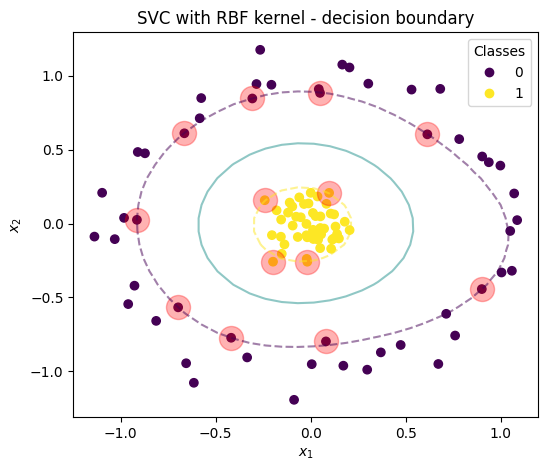

In [17]:
# SVM with RBF kernel on the non-linearly separable circles dataset
svc_rbf = SVC(kernel='rbf')  # default gamma='scale', C=1.0
svc_rbf.fit(x, y)

print("Train accuracy (rbf):", accuracy_score(y, svc_rbf.predict(x)))
print("Number of support vectors per class:", svc_rbf.n_support_)

plt.figure(figsize=(6,5))
plot_data(x, y)
plot_svc_decision_function(svc_rbf)
plt.title("SVC with RBF kernel - decision boundary")
plt.show()

Un noyau rbf a un paramètre nommé gamma dont le réglage peut s'avérer difficile. Un SVM a en plus un paramètre  de régularisation C. Trouver les meilleures valeurs pour ces deux paramètres n'est pas facile, mais l'on peut les ttrouver automatiquement à l'aide d'un grid search (une recherche en grille). À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`: Noyau rbf avec gamma parmi [$10^{-1},10^{-2},10^{-3}$] et C parmi [$0.1,1,10,100$]. Le meilleur modèle est dans l'attribut `best_estimator_`. Affichez la frontière de décision obtenue avec ce meilleur estimateur.

Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy: 1.0
Support vectors per class: [18 17]


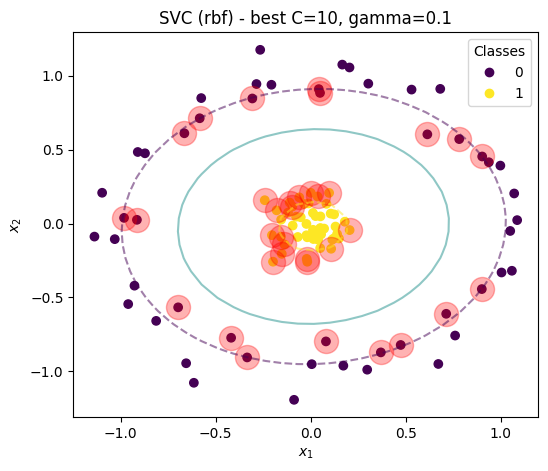

In [18]:
from sklearn.model_selection import GridSearchCV

# grid search over RBF SVC parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-1, 1e-2, 1e-3],
    'kernel': ['rbf']
}
svc = SVC()  # SVC already imported in the notebook
gs = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(x, y)

print("Best params:", gs.best_params_)
print("Best CV accuracy:", gs.best_score_)

best_svc = gs.best_estimator_
print("Support vectors per class:", best_svc.n_support_)

# plot data and decision boundary of best estimator
plt.figure(figsize=(6,5))
plot_data(x, y)
plot_svc_decision_function(best_svc)
plt.title(f"SVC (rbf) - best C={gs.best_params_['C']}, gamma={gs.best_params_['gamma']}")
plt.show()

Chargez les données iris avec pandas, faites un découpage en train/test. Testez ensuite différents SVMs avec des noyaux polynomiaux ou rbf. Réglez les paramètres par un grid search. Affichez les performances en test et la matrice de confusion.

Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy: 0.9727272727272727
Test accuracy (best SVM): 0.947


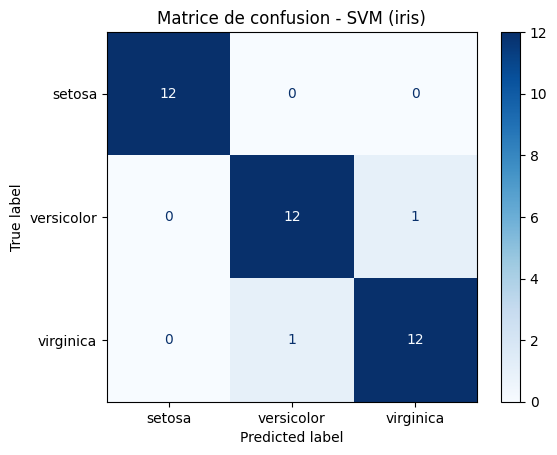

In [19]:
import pandas as pd
from sklearn.datasets import load_iris

# récupérer les données iris (utilise la variable iris si elle existe déjà)
try:
    df = iris.frame
except NameError:
    iris = load_iris(as_frame=True)
    df = iris.frame

# features / target (ici on utilise toutes les caractéristiques)
X = df[iris.feature_names].values
y = iris.target

# découpage train/test
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# grille de recherche pour kernels RBF et polynomial
param_grid = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [1e-1, 1e-2, 1e-3]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0.0, 1.0]}
]

gs = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(x_train_iris, y_train_iris)

print("Best params:", gs.best_params_)
print("Best CV accuracy:", gs.best_score_)

best_svc = gs.best_estimator_
y_pred = best_svc.predict(x_test_iris)
test_acc = accuracy_score(y_test_iris, y_pred)
print(f"Test accuracy (best SVM): {test_acc:.3f}")

# matrice de confusion
cm = confusion_matrix(y_test_iris, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - SVM (iris)")
plt.show()

Appliquez un SVM rbf sur le problème de classification des digits précédent. Réglez automatiquement les paramètres. Affichez les performances en test. Est-ce mieux que le RandomForest ?

Best params (SVM digits): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy (SVM digits): 0.9918325760704942
SVM (rbf) - Test accuracy: 0.989


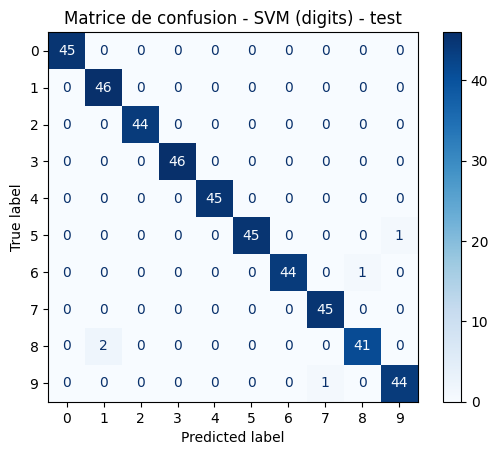

Random Forest (digits) - Test accuracy: 0.947
SVM (rbf) performs better on the test set.


In [20]:
# Grid search + SVM (RBF) on digits dataset, evaluation and comparison with RandomForest already trained (rf_digits)
param_grid_digits = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-1, 1e-2, 1e-3, 'scale'],
    'kernel': ['rbf']
}

gs_digits = GridSearchCV(SVC(), param_grid_digits, scoring='accuracy', cv=5, n_jobs=-1)
gs_digits.fit(x_train_digits, y_train_digits)

print("Best params (SVM digits):", gs_digits.best_params_)
print("Best CV accuracy (SVM digits):", gs_digits.best_score_)

best_svc_digits = gs_digits.best_estimator_
svm_test_acc = accuracy_score(y_test_digits, best_svc_digits.predict(x_test_digits))
print(f"SVM (rbf) - Test accuracy: {svm_test_acc:.3f}")

# Confusion matrix for SVM on test set
cm_svm = confusion_matrix(y_test_digits, best_svc_digits.predict(x_test_digits))
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=labels).plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - SVM (digits) - test")
plt.show()

# Compare with Random Forest test accuracy (variable `test_acc` from RandomForest run)
try:
    rf_acc = test_acc  # previously computed Random Forest test accuracy on digits
except NameError:
    rf_acc = None

if rf_acc is not None:
    print(f"Random Forest (digits) - Test accuracy: {rf_acc:.3f}")
    if svm_test_acc > rf_acc:
        print("SVM (rbf) performs better on the test set.")
    elif svm_test_acc < rf_acc:
        print("Random Forest performs better on the test set.")
    else:
        print("Both models have equal test accuracy.")
else:
    print("Random Forest test accuracy not available for comparison.")